## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [ ]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [ ]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [52]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [5]:
y  = df["project_is_approved"]
X = df.drop(['project_is_approved'],axis=1)
X.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

X_train.shape

## 1.1 Text Vectorization

In [6]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [7]:
texts = X['essay'].to_list()
print(len(texts))

109248


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AxesSubplot:ylabel='Count'>

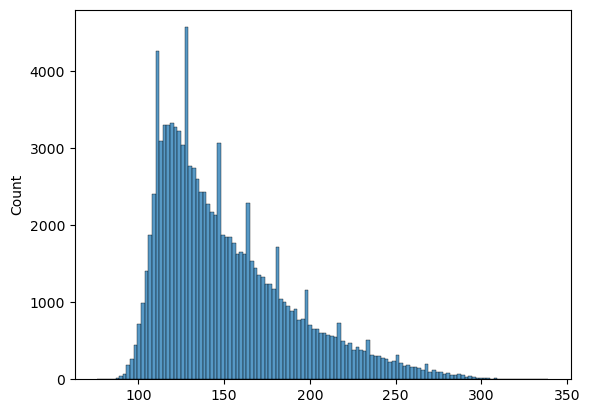

In [8]:
import seaborn as sns
essay_lengths = []
for essay in texts:
    essay_lengths.append(len(essay.split(' ')))  
sns.histplot(essay_lengths)

In [9]:
import numpy as np
np.percentile(essay_lengths,95)

231.0

In [10]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)

In [11]:
vocab = tokenizer.word_index
len(vocab)

56381

In [12]:
text_to_sequence = tokenizer.texts_to_sequences(texts)
padded_data = tf.keras.preprocessing.sequence.pad_sequences(text_to_sequence,padding='post',maxlen=230)

In [13]:
padded_data[0]

array([    2,   996,   297,    18,  2585,  3677,   265,   733,     6,
          66,   265,  1418,     1,   275,  2381,     2,    24,    19,
        1488,  3727,   265,   733,     6,   371,     3,    30,    46,
        1202,   200,   265,   188,     4,     1,    22,   118,   140,
         448,    68,   402,   710,    12,     8,   243,    98,    65,
         469,   733,    72,    42,    46,   311,   127,     1,   271,
        1558,     2,   237,   286,    65,   265,   720,   136,     2,
          24,    18,   733,  1516,    11,  1241,    65,   199,   200,
         443,   146,     2,  2586,   733,   394,    68,   309,  7229,
        1241,   450,    49,   600,   733,    53,  3607,  2709,  5311,
       18004, 10927, 15101,     7,  1419,  1511,   475,   371,     3,
          30,     2,  1488,   733,  2514,  1348,  4484,  4905,  6569,
         924,     2,   144,    40,  1511,     8,   103,   375,     2,
         147,   313,    58,    70,   313,    42,     7,   733,    72,
         544,   330,

In [14]:
padded_data.shape

(109248, 230)

In [15]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/



In [16]:
import pickle
from tqdm import tqdm

with open('glove_vectors', 'rb') as f:
    glove_vec = pickle.load(f)
    glove_words =  set(glove_vec.keys())


In [17]:
len(glove_vec.keys())

51510

In [18]:
vocab_size = len(vocab) + 1
word_dims = 300

embeding = np.zeros((vocab_size,word_dims))

count = 0
not_found = [] 
for word,idx in vocab.items():# There is not item with idx 0 in vocab dict
    if glove_vec.get(word) is not None:
        count+=1
        embeding[idx] = glove_vec[word]
    else:
        not_found.append(word)
print(len(vocab)-count, count/len(vocab))

6744 0.8803852361611181


In [19]:
embeding.shape

(56382, 300)

In [20]:
not_found[:20]

['hokki',
 'ozobots',
 'ozobot',
 'storyworks',
 'gonoodle',
 'fitbits',
 'mobymax',
 'rekenreks',
 'tiggly',
 'breakoutedu',
 'bloxels',
 'newsela',
 'zearn',
 '3doodlers',
 'xtramath',
 'magnatiles',
 'hooki',
 'plickers',
 'makeys',
 'rekenrek']

Embedding matrix is formed

## 1.2 Categorical feature Vectorization

In [21]:
X.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [22]:
numerical_features = ['teacher_number_of_previously_posted_projects','price']
categorical_features = ['school_state', 'project_grade_category','clean_categories','clean_subcategories','teacher_prefix']

In [23]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.
label_encoders = []
feature_encoded = []
for feature in tqdm(categorical_features):
    encode = dict()
    featurized = []
    for idx,feat in enumerate(X[feature].unique()):
        encode[feat] = idx
    
    label_encoders.append(encode)
    
    for cat in X[feature]:
        featurized.append(encode[cat])
    
    feature_encoded.append(featurized)
    print(f"Feature : {feature} has {len(encode)}")

100%|██████████████████████████████| 5/5 [00:00<00:00, 38.68it/s]

Feature : school_state has 51
Feature : project_grade_category has 4
Feature : clean_categories has 51
Feature : clean_subcategories has 401
Feature : teacher_prefix has 5


In [24]:
cat_features = np.array(feature_encoded).T

In [25]:
cat_features.shape

(109248, 5)

## 1.3 Numerical feature Vectorization

In [26]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [27]:
tmean, pmean = X[numerical_features].mean()

In [28]:
tstd, pstd = X[numerical_features].std()

In [29]:
standard_no_project = (X['teacher_number_of_previously_posted_projects'].to_numpy() - tmean) / tstd
standard_price = (X['price'].to_numpy() - pmean) / pstd

In [30]:
num_pred = np.vstack([standard_no_project,standard_price])

In [31]:
num_pred = num_pred.T
num_pred.shape

(109248, 2)

In [32]:
padded_data.shape

(109248, 230)

In [33]:
X_final =np.hstack([padded_data,cat_features[:,0].reshape(-1,1),cat_features[:,1].reshape(-1,1),cat_features[:,2].reshape(-1,1),
                    cat_features[:,3].reshape(-1,1),cat_features[:,4].reshape(-1,1),num_pred])
y_final = y.to_numpy()

In [34]:
X_final.shape

(109248, 237)

In [35]:
y_final.shape

(109248,)

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,stratify=y_final)

## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [37]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [38]:
in_len = padded_data.shape[1]
in_cat_feat = 1
num_feat = 2

# Defining inputs
essay_seq_input_layer = tf.keras.Input(shape=(in_len,),dtype= tf.int32)# The input will be a sequence 
student_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
project_grade_category_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
clean_categories_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
clean_subcategories_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
teacher_prefix_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype = tf.int32)
numerical_input_layer = tf.keras.Input(shape=(num_feat,),dtype = tf.int32)


#Defining embbeding layers
essay_embbeding_layer = tf.keras.layers.Embedding(input_dim= vocab_size,output_dim = word_dims,weights=[embeding],
                                            input_length=in_len, trainable=False)(essay_seq_input_layer)

student_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[0])+1,output_dim = 5,
                                            input_length=1)(student_input_layer)

project_grade_category_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[1])+1,output_dim = 2,
                                            input_length=1)(project_grade_category_input_layer)

clean_categories_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[2])+1,output_dim = 5,
                                            input_length=1)(clean_categories_input_layer)

clean_subcategories_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[3])+1,output_dim = 5,
                                            input_length=1)(clean_subcategories_input_layer)

teacher_prefix_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[4])+1,output_dim = 2,
                                            input_length=1)(teacher_prefix_input_layer)

# LSTM on embbeding layer
lstm = tf.keras.layers.LSTM(units = 20)(essay_embbeding_layer)

# Flatten

f1 = tf.keras.layers.Flatten()(lstm)
f2 = tf.keras.layers.Flatten()(student_embbeding_layer)
f3 = tf.keras.layers.Flatten()(project_grade_category_embbeding_layer)
f4 = tf.keras.layers.Flatten()(clean_categories_embbeding_layer)
f5 = tf.keras.layers.Flatten()(clean_subcategories_embbeding_layer)
f6 = tf.keras.layers.Flatten()(teacher_prefix_embbeding_layer)

# Dense for numerical
f7 = tf.keras.layers.Dense(1,activation='sigmoid')(numerical_input_layer)

# Concat
concat = tf.keras.layers.concatenate([f1,f2,f3,f4,f5,f6,f7],axis=1)

dense_1 = tf.keras.layers.Dense(512,activation='relu')(concat)

dropout_1 = tf.keras.layers.Dropout(0.3)(dense_1)

dense_2 = tf.keras.layers.Dense(16,activation='relu')(dropout_1)

dropout_2 = tf.keras.layers.Dropout(0.3)(dense_2)

dense_3 = tf.keras.layers.Dense(8,activation='relu')(dropout_2)

output = tf.keras.layers.Dense(1,activation='sigmoid')(dense_3)

model = tf.keras.Model([essay_seq_input_layer,
                        student_input_layer,
                        project_grade_category_input_layer,
                        clean_categories_input_layer,
                        clean_subcategories_input_layer,
                        teacher_prefix_input_layer,
                        numerical_input_layer
                       ],
                        output
                      )

2022-10-26 23:24:34.369694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 23:24:35.017940: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10417 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1


In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 230)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 230, 300)     16914600    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                              

## 1.5 Compiling and fititng your model

In [40]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

optimse = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc', min_delta=0.01, patience=3, verbose=1)
model.compile(optimizer = optimse , loss='binary_crossentropy' , metrics= ['binary_accuracy' , tf.metrics.AUC(name='auc')])

model.fit([X_train[:,:230],X_train[:,230:231],X_train[:,231:232],X_train[:,232:233],X_train[:,233:234],X_train[:,234:235],X_train[:,235:237]],
          y_train,validation_data=([X_test[:,:230],X_test[:,230:231],X_test[:,231:232],X_test[:,232:233],X_test[:,233:234],X_test[:,234:235],X_test[:,235:237]],
                                   y_test),batch_size = 128, epochs = 25,callbacks = [early_stop ])

Epoch 1/25
  1/683 [..............................] - ETA: 35:09 - loss: 0.6818 - binary_accuracy: 0.7891 - auc: 0.4650

2022-10-26 23:24:38.874679: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


683/683 [==============================] - 19s 23ms/step - loss: 0.4290 - binary_accuracy: 0.8485 - auc: 0.5575 - val_loss: 0.4243 - val_binary_accuracy: 0.8486 - val_auc: 0.6009
Epoch 2/25
683/683 [==============================] - 15s 22ms/step - loss: 0.4060 - binary_accuracy: 0.8486 - auc: 0.6539 - val_loss: 0.4029 - val_binary_accuracy: 0.8486 - val_auc: 0.7036
Epoch 3/25
683/683 [==============================] - 15s 22ms/step - loss: 0.3818 - binary_accuracy: 0.8487 - auc: 0.7171 - val_loss: 0.3773 - val_binary_accuracy: 0.8486 - val_auc: 0.7354
Epoch 4/25
683/683 [==============================] - 15s 22ms/step - loss: 0.3731 - binary_accuracy: 0.8488 - auc: 0.7356 - val_loss: 0.3747 - val_binary_accuracy: 0.8486 - val_auc: 0.7416
Epoch 5/25
683/683 [==============================] - 15s 22ms/step - loss: 0.3652 - binary_accuracy: 0.8513 - auc: 0.7533 - val_loss: 0.3740 - val_binary_accuracy: 0.8523 - val_auc: 0.7513
Epoch 6/25
683/683 [==============================] - 15s 22m

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vect = TfidfVectorizer()
vect.fit(texts)

TfidfVectorizer()

In [22]:
len(vect.vocabulary_),vect.idf_

(56345,
 array([ 7.18528456,  5.91178569, 11.90823778, ..., 11.50277267,
        11.50277267, 11.90823778]))

In [23]:
truth_vals = np.logical_and(vect.idf_>=2,vect.idf_<=11)

In [24]:
np.unique(truth_vals,return_counts=True)

(array([False,  True]), array([32034, 24311]))

In [25]:
idxs = []
for i,truth_val in enumerate(truth_vals):
    if truth_val:
        idxs.append(i)

In [26]:
idxs[:10]

[0, 1, 7, 9, 10, 15, 21, 25, 29, 41]

In [27]:
lookup = set(idxs)
count = 0
tfidf_vocab = dict()
for word,num in tqdm(vect.vocabulary_.items()):
    if num in lookup:
        tfidf_vocab[word] = count
        count+=1

100%|█████████████████| 56345/56345 [00:00<00:00, 1199622.64it/s]


In [30]:
tfidf_vocab = set(tfidf_vocab.keys())

In [33]:
prep_text = []
lengths = []
for para in tqdm(texts):
    words = para.split(" ")
    new_para = ''
    length = 0
    for word in words:
        if word in tfidf_vocab:
            new_para += word+' '
            length+=1
    lengths.append(length)
    prep_text.append(new_para.strip())

100%|█████████████████| 109248/109248 [00:05<00:00, 18355.65it/s]


<AxesSubplot:ylabel='Count'>

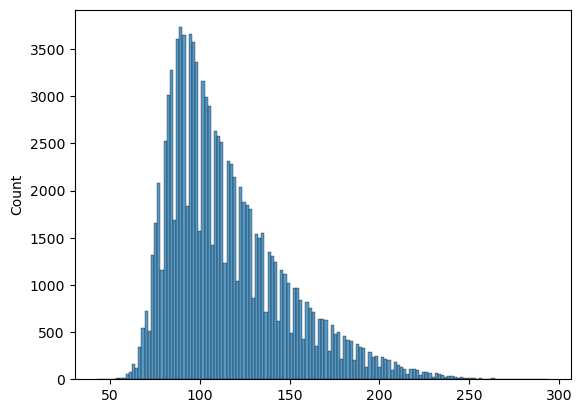

In [34]:
sns.histplot(lengths)

In [38]:
np.percentile(lengths,99.9)

248.0

In [39]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(prep_text)
vocab = tokenizer.word_index
text_to_sequence = tokenizer.texts_to_sequences(prep_text)
padded_data = tf.keras.preprocessing.sequence.pad_sequences(text_to_sequence,padding='post',maxlen=230)

In [58]:
len(vocab.keys())
vocab_size = len(vocab) + 1
word_dims = 300

embeding = np.zeros((vocab_size,word_dims))

count = 0
not_found = [] 
for word,idx in vocab.items():# There is not item with idx 0 in vocab dict
    if glove_vec.get(word) is not None:
        count+=1
        embeding[idx] = glove_vec[word]
    else:
        not_found.append(word)
print(len(vocab)-count, count/len(vocab))

306 0.9874131051787257


In [59]:
embeding.shape

(24312, 300)

In [56]:
from sklearn.model_selection import train_test_split

X_final =np.hstack([padded_data,cat_features[:,0].reshape(-1,1),cat_features[:,1].reshape(-1,1),cat_features[:,2].reshape(-1,1),
                    cat_features[:,3].reshape(-1,1),cat_features[:,4].reshape(-1,1),num_pred])
y_final = y.to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,stratify=y_final)

In [60]:
in_len = padded_data.shape[1]
in_cat_feat = 1
num_feat = 2

# Defining inputs
essay_seq_input_layer = tf.keras.Input(shape=(in_len,),dtype= tf.int32)# The input will be a sequence 
student_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
project_grade_category_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
clean_categories_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
clean_subcategories_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype= tf.int32)
teacher_prefix_input_layer = tf.keras.Input(shape=(in_cat_feat,),dtype = tf.int32)
numerical_input_layer = tf.keras.Input(shape=(num_feat,),dtype = tf.int32)


#Defining embbeding layers
essay_embbeding_layer = tf.keras.layers.Embedding(input_dim= vocab_size,output_dim = word_dims,weights=[embeding],
                                            input_length=in_len, trainable=False)(essay_seq_input_layer)

student_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[0])+1,output_dim = 5,
                                            input_length=1)(student_input_layer)

project_grade_category_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[1])+1,output_dim = 2,
                                            input_length=1)(project_grade_category_input_layer)

clean_categories_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[2])+1,output_dim = 5,
                                            input_length=1)(clean_categories_input_layer)

clean_subcategories_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[3])+1,output_dim = 5,
                                            input_length=1)(clean_subcategories_input_layer)

teacher_prefix_embbeding_layer = tf.keras.layers.Embedding(input_dim= len(label_encoders[4])+1,output_dim = 2,
                                            input_length=1)(teacher_prefix_input_layer)

# LSTM on embbeding layer
lstm = tf.keras.layers.LSTM(units = 20)(essay_embbeding_layer)

# Flatten

f1 = tf.keras.layers.Flatten()(lstm)
f2 = tf.keras.layers.Flatten()(student_embbeding_layer)
f3 = tf.keras.layers.Flatten()(project_grade_category_embbeding_layer)
f4 = tf.keras.layers.Flatten()(clean_categories_embbeding_layer)
f5 = tf.keras.layers.Flatten()(clean_subcategories_embbeding_layer)
f6 = tf.keras.layers.Flatten()(teacher_prefix_embbeding_layer)

# Dense for numerical
f7 = tf.keras.layers.Dense(1,activation='sigmoid')(numerical_input_layer)

# Concat
concat = tf.keras.layers.concatenate([f1,f2,f3,f4,f5,f6,f7],axis=1)

dense_1 = tf.keras.layers.Dense(512,activation='relu')(concat)

dropout_1 = tf.keras.layers.Dropout(0.3)(dense_1)

dense_2 = tf.keras.layers.Dense(16,activation='relu')(dropout_1)

dropout_2 = tf.keras.layers.Dropout(0.3)(dense_2)

dense_3 = tf.keras.layers.Dense(8,activation='relu')(dropout_2)

output = tf.keras.layers.Dense(1,activation='sigmoid')(dense_3)

model = tf.keras.Model([essay_seq_input_layer,
                        student_input_layer,
                        project_grade_category_input_layer,
                        clean_categories_input_layer,
                        clean_subcategories_input_layer,
                        teacher_prefix_input_layer,
                        numerical_input_layer
                       ],
                        output
                      )

2022-10-26 22:52:03.251107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 22:52:06.555465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10417 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1


In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 230)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 230, 300)     7293600     ['input_8[0][0]']                
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                              

In [63]:

optimse = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc', min_delta=0.01, patience=3, verbose=1)
model.compile(optimizer = optimse , loss='binary_crossentropy' , metrics= ['binary_accuracy' , tf.metrics.AUC(name='auc')])

model.fit([X_train[:,:230],X_train[:,230:231],X_train[:,231:232],X_train[:,232:233],X_train[:,233:234],X_train[:,234:235],X_train[:,235:237]],
          y_train,validation_data=([X_test[:,:230],X_test[:,230:231],X_test[:,231:232],X_test[:,232:233],X_test[:,233:234],X_test[:,234:235],X_test[:,235:237]],
                                   y_test),batch_size = 128, epochs = 25,callbacks = [early_stop ])

Epoch 1/25


2022-10-26 22:52:47.914363: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


683/683 [==============================] - 20s 22ms/step - loss: 0.4433 - binary_accuracy: 0.8474 - auc: 0.5186 - val_loss: 0.4231 - val_binary_accuracy: 0.8486 - val_auc: 0.5581
Epoch 2/25
683/683 [==============================] - 14s 21ms/step - loss: 0.4254 - binary_accuracy: 0.8486 - auc: 0.5552 - val_loss: 0.4227 - val_binary_accuracy: 0.8486 - val_auc: 0.5708
Epoch 3/25
683/683 [==============================] - 15s 21ms/step - loss: 0.4215 - binary_accuracy: 0.8486 - auc: 0.5734 - val_loss: 0.4275 - val_binary_accuracy: 0.8486 - val_auc: 0.5658
Epoch 4/25
683/683 [==============================] - 15s 21ms/step - loss: 0.4117 - binary_accuracy: 0.8486 - auc: 0.6325 - val_loss: 0.4099 - val_binary_accuracy: 0.8486 - val_auc: 0.6632
Epoch 5/25
683/683 [==============================] - 15s 21ms/step - loss: 0.3998 - binary_accuracy: 0.8481 - auc: 0.6682 - val_loss: 0.3966 - val_binary_accuracy: 0.8486 - val_auc: 0.6950
Epoch 6/25
683/683 [==============================] - 15s 21m

# <font color='red'> Model-3 </font>

In [43]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

# One Host encoding of other features

In [53]:
import tensorflow as tf
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')
y  = df["project_is_approved"]
X = df.drop(['project_is_approved'],axis=1)
X.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [54]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore',sparse=False)

In [55]:
categorical_features = ['school_state', 'project_grade_category','clean_categories','clean_subcategories','teacher_prefix']

In [56]:
encoder_school_state = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
school_state_onehot = encoder_school_state.fit_transform(X['school_state'].to_numpy().reshape(-1,1))

In [57]:
encoder_project_grade_category = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
project_grade_category_onehot = encoder_project_grade_category.fit_transform(X['project_grade_category'].to_numpy().reshape(-1,1))

In [58]:
encoder_clean_categories = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
clean_categories_onehot = encoder_clean_categories.fit_transform(X['clean_categories'].to_numpy().reshape(-1,1))

In [59]:
encoder_clean_subcategories = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
clean_subcategories_onehot = encoder_clean_subcategories.fit_transform(X['clean_subcategories'].to_numpy().reshape(-1,1))

In [60]:
encoder_teacher_prefix = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
teacher_prefix_onehot = encoder_teacher_prefix.fit_transform(X['teacher_prefix'].to_numpy().reshape(-1,1))

In [61]:
other_feature = np.hstack((school_state_onehot,project_grade_category_onehot,clean_categories_onehot
                           ,clean_subcategories_onehot,teacher_prefix_onehot))

In [62]:
other_feature.shape

(109248, 512)

In [63]:
texts = X['essay'].to_list()
print(len(texts))
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
vocab = tokenizer.word_index
text_to_sequence = tokenizer.texts_to_sequences(texts)
padded_data = tf.keras.preprocessing.sequence.pad_sequences(text_to_sequence,padding='post',maxlen=230)

109248


In [64]:
vocab_size = len(vocab) + 1
word_dims = 300

embeding = np.zeros((vocab_size,word_dims))

count = 0
not_found = [] 
for word,idx in vocab.items():# There is not item with idx 0 in vocab dict
    if glove_vec.get(word) is not None:
        count+=1
        embeding[idx] = glove_vec[word]
    else:
        not_found.append(word)
print(len(vocab)-count, count/len(vocab))

6744 0.8803852361611181


In [65]:
padded_data.shape

(109248, 230)

In [66]:
X_final = np.hstack((padded_data,other_feature))
y_final = y.to_numpy()

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,stratify=y_final)

In [67]:
X_final.shape

(109248, 742)

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [73]:
in_len = padded_data.shape[1]
in_other_len = other_feature.shape[1]

# Defining inputs
essay_seq_input_layer = tf.keras.Input(shape=(in_len,),dtype= tf.int32)# The input will be a sequence 
other_inputs_layers = tf.keras.Input(shape=(in_other_len,1,))

#Defining embbeding layers
essay_embbeding_layer = tf.keras.layers.Embedding(input_dim= vocab_size,output_dim = word_dims,weights=[embeding],
                                            input_length=in_len, trainable=False)(essay_seq_input_layer)

conv_1d_layer_1 = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, strides = 3, activation = "relu")(other_inputs_layers)
conv_1d_layer_2 = tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = "relu")(conv_1d_layer_1)


# LSTM on embbeding layer
lstm = tf.keras.layers.LSTM(units = 20)(essay_embbeding_layer)

# Flatten

f1 = tf.keras.layers.Flatten()(lstm)
f2 = tf.keras.layers.Flatten()(conv_1d_layer_2)

# Concat
concat = tf.keras.layers.concatenate([f1,f2],axis=1)

dense_1 = tf.keras.layers.Dense(64,activation='relu')(concat)

dropout_1 = tf.keras.layers.Dropout(0.3)(dense_1)

dense_2 = tf.keras.layers.Dense(16,activation='relu')(dropout_1)

dropout_2 = tf.keras.layers.Dropout(0.3)(dense_2)

dense_3 = tf.keras.layers.Dense(8,activation='relu')(dropout_2)

output = tf.keras.layers.Dense(1,activation='sigmoid')(dense_3)

model_3 = tf.keras.Model([essay_seq_input_layer,
                        other_inputs_layers
                       ],
                        output
                      )

In [74]:
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 230)]        0           []                               
                                                                                                  
 input_17 (InputLayer)          [(None, 512, 1)]     0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 230, 300)     16914600    ['input_16[0][0]']               
                                                                                                  
 conv1d_5 (Conv1D)              (None, 170, 64)      384         ['input_17[0][0]']               
                                                                                            

In [76]:
optimse = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc', min_delta=0.01, patience=3, verbose=1)
model_3.compile(optimizer = optimse , loss='binary_crossentropy' , metrics= ['binary_accuracy' , tf.metrics.AUC(name='auc')])

model_3.fit([X_train[:,:230],X_train[:,230:]],y_train,validation_data=([X_test[:,:230],X_test[:,230:]],y_test),
            batch_size = 128, epochs = 25,callbacks = [early_stop ])

Epoch 1/25


2022-10-27 00:48:49.356343: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


683/683 [==============================] - 20s 21ms/step - loss: 0.4462 - binary_accuracy: 0.8443 - auc: 0.5284 - val_loss: 0.4387 - val_binary_accuracy: 0.8486 - val_auc: 0.5809
Epoch 2/25
683/683 [==============================] - 14s 21ms/step - loss: 0.4258 - binary_accuracy: 0.8486 - auc: 0.5582 - val_loss: 0.4288 - val_binary_accuracy: 0.8486 - val_auc: 0.5760
Epoch 3/25
683/683 [==============================] - 14s 21ms/step - loss: 0.3970 - binary_accuracy: 0.8483 - auc: 0.6781 - val_loss: 0.3983 - val_binary_accuracy: 0.8486 - val_auc: 0.7255
Epoch 4/25
683/683 [==============================] - 14s 21ms/step - loss: 0.3784 - binary_accuracy: 0.8485 - auc: 0.7227 - val_loss: 0.3821 - val_binary_accuracy: 0.8489 - val_auc: 0.7424
Epoch 5/25
683/683 [==============================] - 14s 21ms/step - loss: 0.3723 - binary_accuracy: 0.8501 - auc: 0.7360 - val_loss: 0.3814 - val_binary_accuracy: 0.8498 - val_auc: 0.7455
Epoch 6/25
683/683 [==============================] - 14s 21m

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">Best Validation loss<br></th>
    <th class="tg-0pky">Best Train Loss</th>
    <th class="tg-0pky">Best Validation accuray</th>
    <th class="tg-0pky">Best Validation AUC<br></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">Model 1</td>
    <td class="tg-0pky">0.3740</td>
    <td class="tg-0pky">0.3492</td>
    <td class="tg-0pky">0.8488</td>
    <td class="tg-0pky">0.7546</td>
  </tr>
  <tr>
    <td class="tg-0pky">Model 2</td>
    <td class="tg-0pky">0.3783</td>
    <td class="tg-0pky">0.3577</td>
    <td class="tg-0pky">0.8502</td>
    <td class="tg-0pky">0.7423</td>
  </tr>
  <tr>
    <td class="tg-0pky">Model 3</td>
    <td class="tg-0pky">0.3701</td>
    <td class="tg-0pky">0.3645</td>
    <td class="tg-0pky">0.8518</td>
    <td class="tg-0pky">0.7499</td>
  </tr>
</tbody>
</table>

Model 3 has best validation loss and best validation accuracy but Model 1 has best ACU of 0.7546